In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

df = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_public.csv')
df_questions = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_schema.csv')

def countVisitFreq(index):
    counts = (df.loc[:, [index,'SOVisitFreq']]
                            .groupby([index,'SOVisitFreq'])
                            .value_counts()
                            .reset_index())
    freqSortList = ['Less than once per month or monthly',
                     'A few times per month or weekly',
                     'A few times per week',
                     'Daily or almost daily',
                     'Multiple times per day']
    return counts.pivot(index=index, columns='SOVisitFreq', values=0)[freqSortList]

In [2]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
df_questions

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


let's find who visits stack overflow more often maybe by demographics, skills? education? favourite techs if justified?

<BarContainer object of 7 artists>

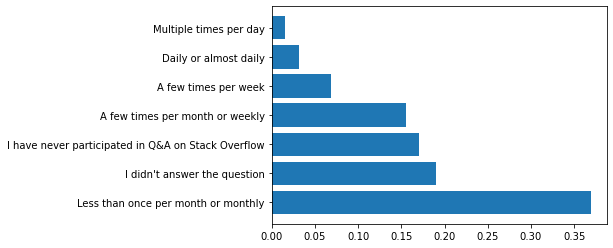

In [4]:
c = df['SOPartFreq'].fillna("I didn't answer the question").value_counts(normalize=True, dropna=False)
plt.barh(c.index, c.values)
#move the nan out of the way please

<BarContainer object of 6 artists>

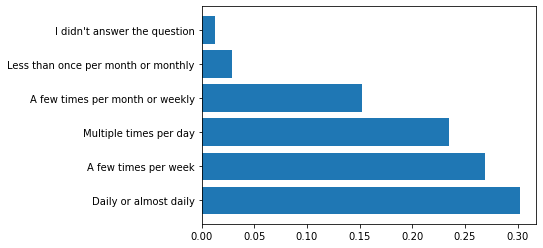

In [5]:
c = df['SOVisitFreq'].fillna("I didn't answer the question").value_counts(normalize=True, dropna=False)
plt.barh(c.index, c.values)
#move the nan out of the way please

Majority of respondents visit stack overflow very often. 26.9% do a few times per week, 30.3% daily, 23.4% even visit the site multiple times a day. but the majority of visitors might not participate in questions very often. 36.8% respondents stated that they participated in Stack Overflow Q&A in once per month or less, a further 17.0% even never participated in a Stack Overflow Q&A. This is anticipated because when users of Stack Overflow have a question to be solved, they usually google the question first to see if they have been asked before. On the other hand, 

Note that Stack Overflow don't force respondents to answer these two questions, meaning that there are a portion of respondents that don't answer the question. when asked about how frequently they visit Stack Overflow, 1.2% respondents don't answer. The number is greater when respondents don't answer how frequently they participated in a Stack Overflow Q&A: About 19% of respondents don't answer the question.

## Demographics Differences

In [6]:
#select top 10 countries with largest respondents
top10Country = df['Country'].value_counts().sort_values(ascending=False)[:10].index.array
country_counts = (df.loc[df['Country'].isin(top10Country), ['Country','SOVisitFreq']]
                        .groupby(['Country','SOVisitFreq'])
                        .value_counts()
                        .reset_index())
freqSortList = ['Less than once per month or monthly',
                 'A few times per month or weekly',
                 'A few times per week',
                 'Daily or almost daily',
                 'Multiple times per day']
countryCombine = country_counts.pivot(index='Country', columns='SOVisitFreq', values=0)[freqSortList]
countryCombine

SOVisitFreq,Less than once per month or monthly,A few times per month or weekly,A few times per week,Daily or almost daily,Multiple times per day
Country,,,,,
Brazil,74,372,589,695,510
Canada,97,575,918,809,578
France,70,369,720,857,664
Germany,141,902,1683,1659,1222
India,197,1081,2210,3577,3256
Italy,25,174,388,601,468
Netherlands,51,286,528,550,355
Poland,44,308,556,541,348
United Kingdom of Great Britain and Northern Ireland,163,810,1383,1213,885


yep pretty much doesn't deviate the rules. visitors usually visit the site a few times per week or daily.

In [14]:
yearCodeCounts = (df.loc[:, ['YearsCode','SOVisitFreq']]
                        .groupby(['YearsCode','SOVisitFreq'])
                        .value_counts()
                        .reset_index())
freqSortList = ['Less than once per month or monthly',
                 'A few times per month or weekly',
                 'A few times per week',
                 'Daily or almost daily',
                 'Multiple times per day']
yearsCodeCombined = yearCodeCounts.pivot(index='YearsCode', columns='SOVisitFreq', values=0)[freqSortList]
yearsCodeCombined

SOVisitFreq,Less than once per month or monthly,A few times per month or weekly,A few times per week,Daily or almost daily,Multiple times per day
YearsCode,,,,,
1,89,309,439,445,320
10,155,837,1570,1897,1577
11,52,302,641,732,610
12,59,474,847,1033,764
13,48,270,542,648,503
14,39,290,515,523,440
15,103,586,1022,1095,799
16,44,240,410,469,320
17,36,224,375,396,293


In [9]:
import natsort

yearsCodeCombined.sort_index(key=natsort.natsort_keygen())

SOVisitFreq,Less than once per month or monthly,A few times per month or weekly,A few times per week,Daily or almost daily,Multiple times per day
YearsCode,,,,,
1,89,309,439,445,320
2,103,533,938,1014,656
3,120,608,1172,1391,1094
4,112,625,1323,1649,1295
5,111,820,1612,1957,1636
6,97,724,1427,1807,1471
7,83,554,1316,1640,1324
8,84,580,1187,1580,1256
9,45,388,804,983,778


In [45]:
yearsCodeCombined = yearsCodeCombined.T
#df years code and visit frequency 
test = (yearsCodeCombined / yearsCodeCombined.sum())
test = test.T

Text(0.5, 1.0, 'Experience vs Percentage of Daily Visits')

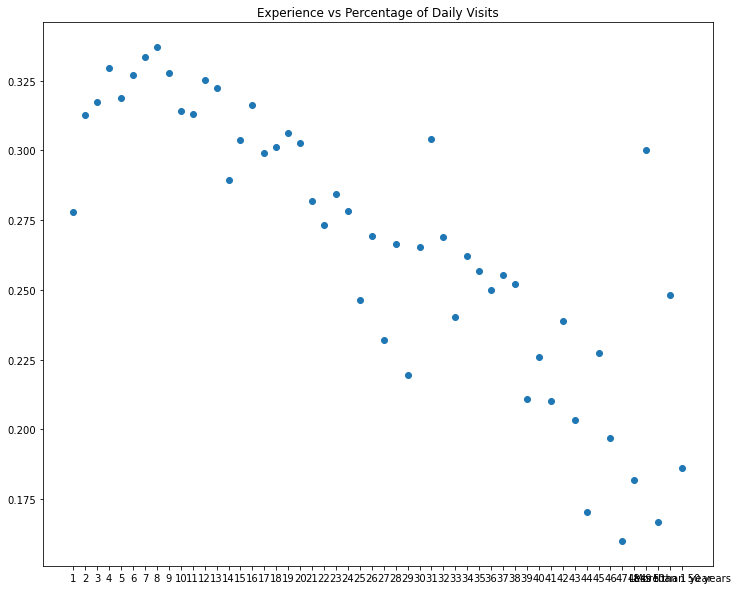

In [55]:
data = test.iloc[:,3].sort_index(key=natsort.natsort_keygen())
f, ax = plt.subplots(figsize=(12,10))
ax.scatter(data.index, data.array)
ax.set_title('Experience vs Percentage of Daily Visits')

As people enter the world of programming, their visit to the Stack Overflow site initially increases. after reaching the peak in 7th year of programming, their use sharply declines. Note that Stack Overflow was launched in 2008. Before 2008, there was no Stack Overflow, so people might used to conceive their own way when they stuck on a problem.

Text(0.5, 1.0, 'Experience vs Percentage of Weekly Visits')

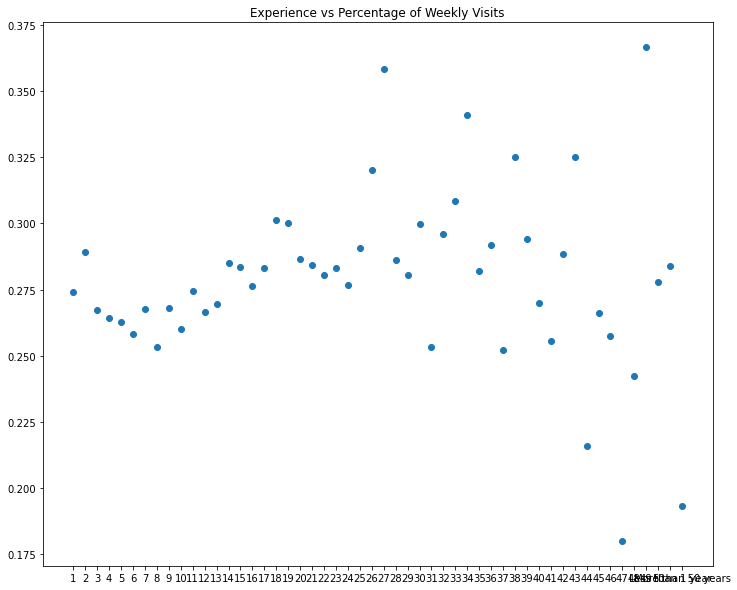

In [57]:
data = test.iloc[:,2].sort_index(key=natsort.natsort_keygen())
f, ax = plt.subplots(figsize=(12,10))
ax.scatter(data.index, data.array)
ax.set_title('Experience vs Percentage of Weekly Visits')

the data is fairly heteroskedastic. if you try, you may discern a zigzag pattern.. an initial decline followed by sharp incline then followed by a heteroskedastic decline. but to me this looks mainly heteroskedastic.

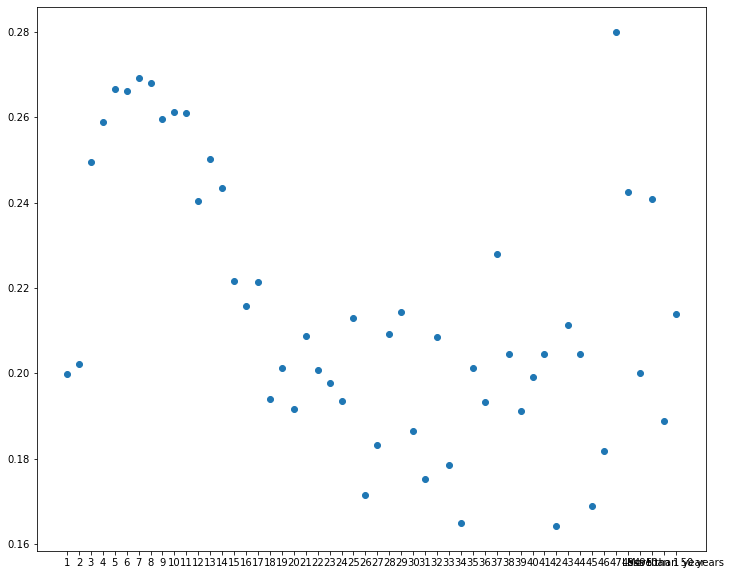

In [58]:
data = test.iloc[:,4].sort_index(key=natsort.natsort_keygen())
f, ax = plt.subplots(figsize=(12,10))
ax.scatter(data.index, data.array)
# ax.set_title('Experience vs Percentage of Weekly Visits')

this data is also fairly heteroskedastic. we can still see that people having low to medium level of experience (under 7 years) usually increases their visit to stack overflow, with a sharp decline afterwards, and an inconsistent pattern follows after their experience reaches 15 years.

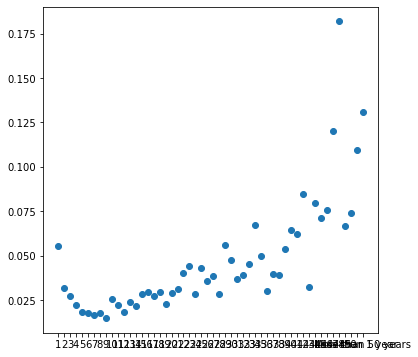

In [65]:
data = test.iloc[:,0].sort_index(key=natsort.natsort_keygen())
f, ax = plt.subplots(figsize=(6,6))
ax.scatter(data.index, data.array)
# ax.set_title('Experience vs Percentage of Weekly Visits')

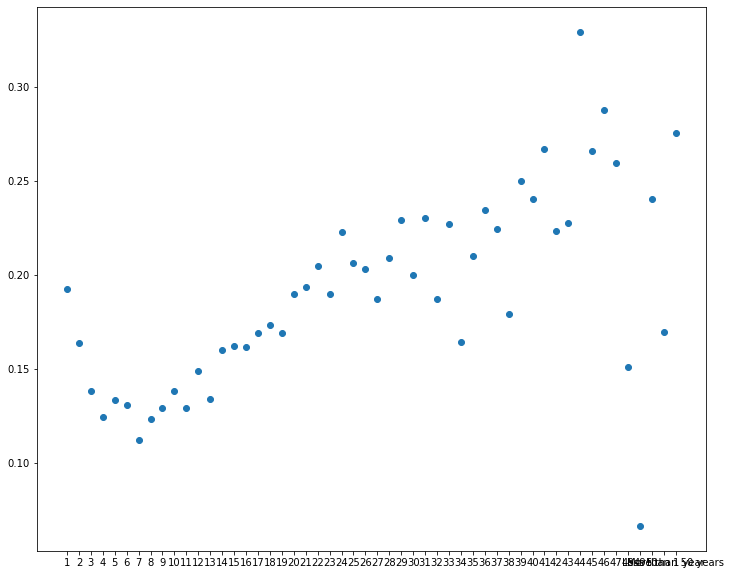

In [60]:
data = test.iloc[:,1].sort_index(key=natsort.natsort_keygen())
f, ax = plt.subplots(figsize=(12,10))
ax.scatter(data.index, data.array)
# ax.set_title('Experience vs Percentage of Weekly Visits')

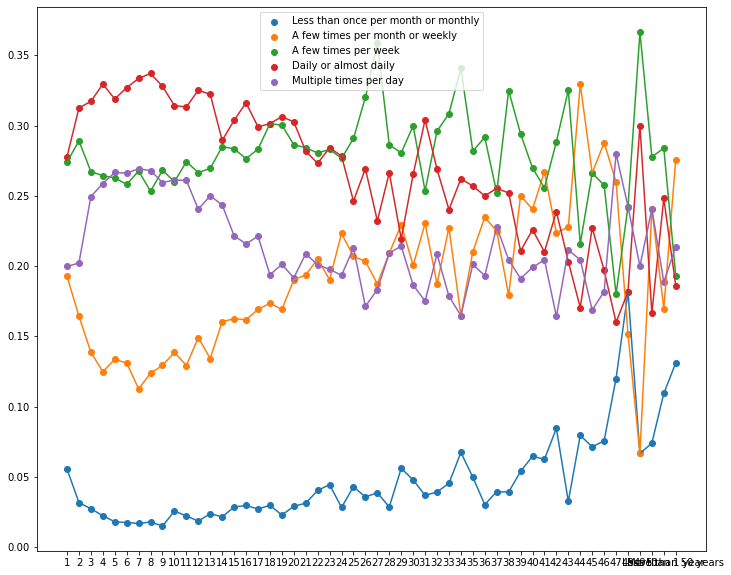

In [73]:
a = test.sort_index(key=natsort.natsort_keygen())
f, ax = plt.subplots(figsize=(12,10))
for i in a.columns:
    data = a.loc[:,i]
    ax.scatter(data.index, data.array, label=i)
    ax.plot(data.index, data.array)
ax.legend()